In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
url="https://raw.githubusercontent.com/masterArnob/IBM-Machine-Learning-with-Python/refs/heads/main/Decision%20Tree/drug-decision-tree.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [57]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [58]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [59]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug'], dtype='object')

In [60]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [63]:
df["drug"].value_counts()

drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ["sex", "bp", "cholesterol", "drug"]:
    df[col] = le.fit_transform(df[col])
df.head()


,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [65]:
df.describe()

,age,sex,bp,cholesterol,na_to_k,drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [66]:
df.corr()

,age,sex,bp,cholesterol,na_to_k,drug
age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
bp,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
na_to_k,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [67]:
df = df.drop(["cholesterol", "age", "sex"], axis=1)
df.head()

,bp,na_to_k,drug
0,0,25.355,4
1,1,13.093,2
2,1,10.114,2
3,2,7.798,3
4,1,18.043,4


In [68]:
df.dtypes

bp           int64
na_to_k    float64
drug         int64
dtype: object

In [69]:
X = df[["bp", "na_to_k"]]
y = df["drug"]

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.11016894,  1.28652212],
       [ 0.10979693, -0.4151454 ],
       [ 0.10979693, -0.82855818],
       [ 1.32976279, -1.14996267],
       [ 0.10979693,  0.27179427],
       [ 1.32976279, -1.03769314],
       [ 1.32976279,  0.02643885],
       [ 0.10979693, -0.70046821],
       [ 1.32976279, -0.12676951],
       [ 0.10979693,  0.45567206],
       [ 0.10979693, -0.59916196],
       [-1.11016894,  0.43221897],
       [ 0.10979693, -0.09832049],
       [ 0.10979693,  0.674105  ],
       [ 1.32976279, -0.46926791],
       [-1.11016894, -0.0788919 ],
       [ 0.10979693, -0.64245998],
       [-1.11016894, -0.29316156],
       [ 0.10979693, -1.21935052],
       [-1.11016894,  1.37242427],
       [ 0.10979693,  0.42236589],
       [ 1.32976279,  1.36451406],
       [ 0.10979693,  2.00995979],
       [ 0.10979693, -0.14550423],
       [ 0.10979693,  2.41490725],
       [-1.11016894,  0.37809645],
       [-1.11016894,  1.9819271 ],
       [ 1.32976279, -0.93028076],
       [ 0.10979693,

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [73]:
y_pred = model.predict(X_test)
y_pred

array([2, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 3, 2, 4, 0, 2,
       2, 4, 4, 4, 2, 3, 4, 3, 4, 2, 3, 4, 0, 4, 2, 0, 4, 0])

Accuracy: 75.0%

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         3
           2       0.44      0.80      0.57         5
           3       0.86      0.55      0.67        11
           4       1.00      1.00      1.00        15

    accuracy                           0.75        40
   macro avg       0.59      0.64      0.59        40
weighted avg       0.76      0.75      0.74        40




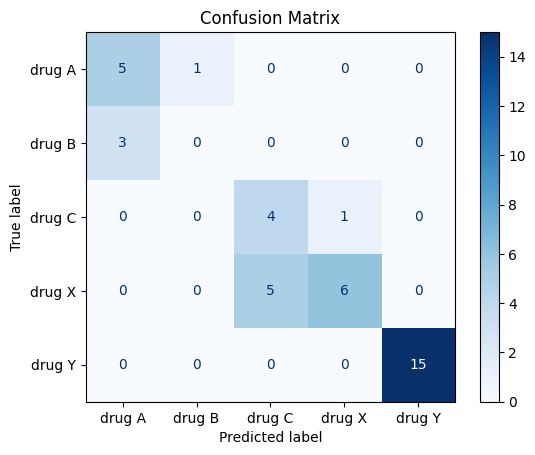

In [75]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
accuracy = accuracy_score(y_test, y_pred) * 100
c_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Classification Report:\n {c_report}\n")
display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["drug A", "drug B", "drug C", "drug X", "drug Y"])
display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


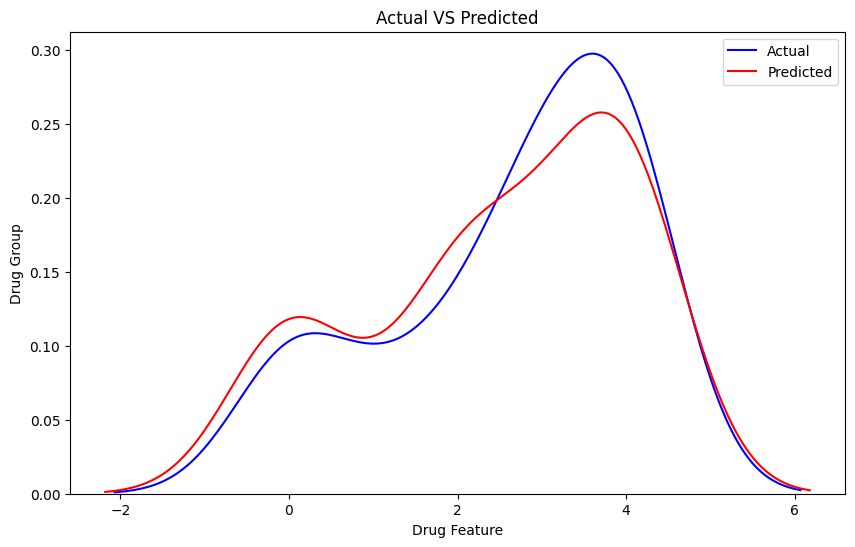

In [82]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.kdeplot(y_test, color="blue", label="Actual", fill=False)
sns.kdeplot(y_pred, color="red", label="Predicted", fill=False)
plt.title("Actual VS Predicted")
plt.xlabel("Drug Feature")
plt.ylabel("Drug Group")
plt.legend()
plt.show()